# Лабораторная работа 5

##  Порядко-статистические фильтры

Разработать программу, иллюстрирующую результаты применения порядково-статистичеких фильтров для бинарных и полутоновых изображений для квадратных окон размера 3x3, 5x5, 7x7.

Содержание отчета:
- Исходные изображения
- Код программы (для Jupyter Notebook)
- Результат работы программы
- Срок: 1.04.2025

In [1]:
%pylab inline
import skimage.io
from matplotlib.pyplot import imread
import matplotlib.pyplot as plt
import numpy as np
from numpy import ceil
from skimage.color import rgb2gray
from skimage.morphology import closing, opening, binary_dilation
from scipy.ndimage import binary_erosion, binary_dilation, binary_closing, binary_opening

Populating the interactive namespace from numpy and matplotlib


In [2]:
def print_images(imgs, *, n_cols=None, fig_dim=None):
    if isinstance(imgs, np.ndarray):
        imgs = [imgs]

    num_imgs = len(imgs)
    if num_imgs == 1:
        n_rows, n_cols = 1, 1
        fig_dim = fig_dim or 5
    else:
        n_cols = n_cols or min([num_imgs, 3])
        n_rows = ceil(num_imgs / n_cols)
        fig_dim = fig_dim or 15

    figsize = (fig_dim, fig_dim / n_cols * n_rows)

    fig, axes = plt.subplots(n_rows, n_cols, figsize=figsize)

    if num_imgs == 1:
        axes = np.array([axes])
    axes = np.atleast_1d(axes).flatten()

    for ax, img in zip(axes, imgs):
        ax.imshow(img, cmap='gray' if img.ndim == 2 else None, interpolation='none')
        ax.axis('off')
    for ax in axes[num_imgs:]:
        ax.axis('off')

    plt.tight_layout()
    plt.show()


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import math
from builtins import min

def print_images(imgs, *, n_cols=None, fig_dim=None):
    if isinstance(imgs, np.ndarray):
        imgs = [imgs]

    num_imgs = len(imgs)

    if num_imgs == 1:
        n_rows, n_cols = 1, 1
        fig_dim = fig_dim or 5
    else:
        n_cols = n_cols or min(int(num_imgs), 3)
        n_rows = math.ceil(num_imgs / n_cols)
        n_rows = int(n_rows)
        fig_dim = fig_dim or 15

    figsize = (fig_dim, fig_dim / n_cols * n_rows)

    fig, axes = plt.subplots(n_rows, n_cols, figsize=figsize)

    if num_imgs == 1:
        axes = [axes]
    else:
        axes = np.array(axes).flatten()

    for i, ax in enumerate(axes):
        if i < num_imgs:
            img = imgs[i]
            if img.ndim == 2:
                ax.imshow(img, cmap='gray', interpolation='none')
            elif img.ndim == 3:
                ax.imshow(img, interpolation='none')
            ax.axis('off')
        else:
            ax.axis('off')

    plt.tight_layout()
    plt.show()


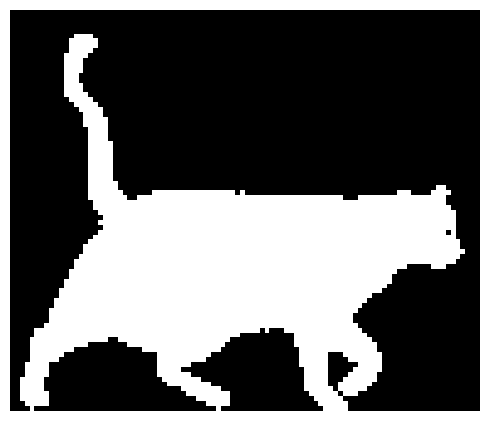

In [4]:
img = (imread('binary.png') > 0.5)[::2, ::2, 0]
print_images(img)

In [5]:
def kth_stat_bin(img: np.ndarray, r: int, k: int) -> np.ndarray:
    """
    Computes a binary image where each pixel is set to 1 if the sum of its neighborhood
    (defined by radius r) is greater than or equal to k-1, otherwise 0.

    :param img: Input binary image (numpy array)
    :param r: Radius of the neighborhood
    :param k: Threshold for binarization
    :return: Binary image with the same shape as input
    """
    result = np.zeros_like(img, dtype=np.uint8)
    padded_img = np.pad(img, r, mode='constant', constant_values=0)

    for i in range(r, padded_img.shape[0] - r):
        for j in range(r, padded_img.shape[1] - r):
            local_sum = np.sum(padded_img[i - r: i + r + 1, j - r: j + r + 1])
            result[i - r, j - r] = 1 if local_sum >= (k - 1) else 0

    return result

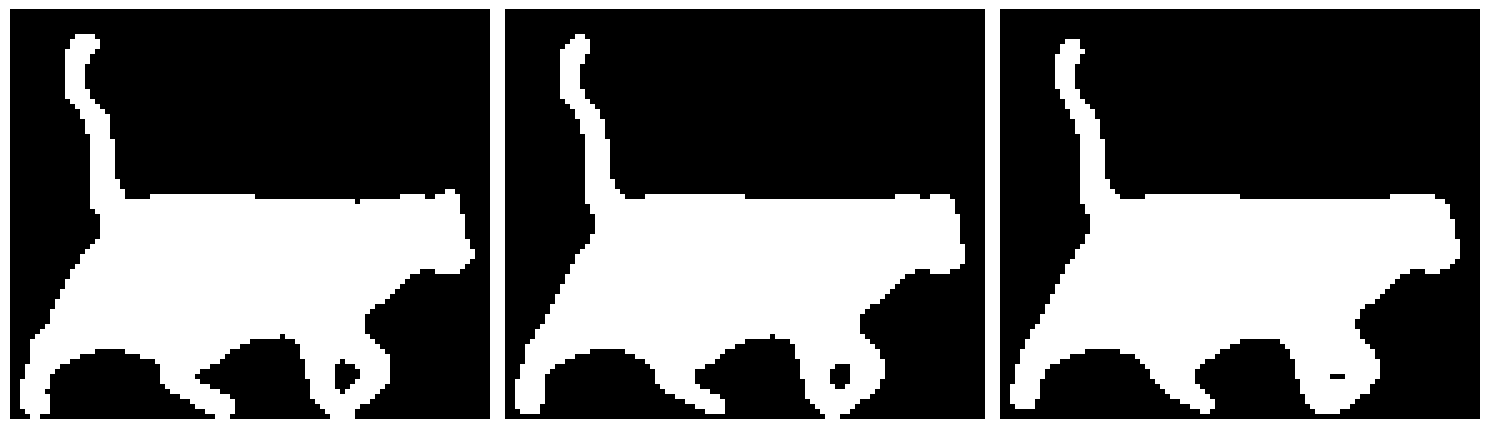

In [6]:
img_3 = kth_stat_bin(img, 1, 5)
img_5 = kth_stat_bin(img, 2, 13)
img_7 = kth_stat_bin(img, 3, 25)

print_images([img_3, img_5, img_7])

In [7]:
def kth_stat_gray(img, r, k):
    result = np.zeros_like(img)
    img = pad(img, r, "constant")
    for i in range(r, img.shape[0] - r):
        for j in range(r, img.shape[1] - r):
            result[i - r][j - r] = sorted((img[i - r: i + r + 1, j - r: j + r + 1]).flatten())[k - 1]
    return result

In [8]:
import numpy as np

def kth_stat_gray(img, r, k):
    """Computes the k-th order statistic in a neighborhood of radius r.

    Parameters:
    img -- Input grayscale image (NumPy array)
    r   -- Radius of the neighborhood
    k   -- Order statistic (1 = min, middle value = median, etc.)

    Returns:
    result -- Processed image with the applied filter
    """
    height, width = img.shape
    result = np.zeros((height, width), dtype=img.dtype)
    padded_img = np.pad(img, r, mode='constant', constant_values=0)
    for i in range(height):
        for j in range(width):
            window = []
            for di in range(-r, r + 1):
                for dj in range(-r, r + 1):
                    window.append(padded_img[i + r + di, j + r + dj])
            window.sort()
            result[i, j] = window[k - 1]

    return result


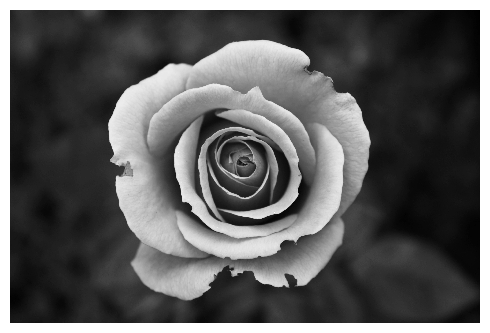

In [9]:
img_gray = imread('rose.jpg')[:, :, 0]
print_images(img_gray)

In [10]:
from scipy.ndimage import generic_filter
def kth_stat_gray(img, r, k):
    """Computes the k-th order statistic in a neighborhood of radius r.

    Parameters:
    img -- Input grayscale image (NumPy array)
    r   -- Radius of the neighborhood
    k   -- Order statistic (1 = min, middle value = median, etc.)

    Returns:
    result -- Processed image with the applied filter
    """
    k = max([1, min(np.array([k, (2 * r + 1) ** 2]))])  # Ensure k is within bounds
    return generic_filter(img, lambda x: np.partition(x, k - 1)[k - 1], size=(2 * r + 1, 2 * r + 1))


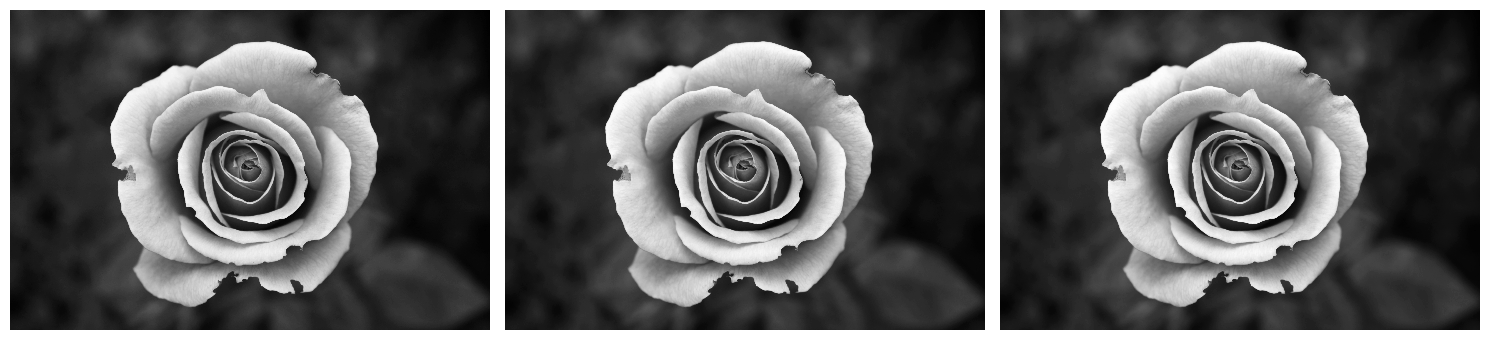

In [11]:
img_gray_3 = kth_stat_gray(img_gray, 1, 5)
img_gray_5 = kth_stat_gray(img_gray, 2, 13)
img_gray_7 = kth_stat_gray(img_gray, 3, 25)

print_images([img_gray_3, img_gray_5, img_gray_7])